In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [ ]:
df=pd.read_csv(r"C:\Users\malle\OneDrive\Desktop\car_price_dataset.csv")
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
brand=pd.get_dummies(df['Brand'],prefix="Brand")
print(brand)

      Brand_Audi  Brand_BMW  Brand_Chevrolet  Brand_Ford  Brand_Honda  \
0              0          0                0           0            0   
1              0          0                1           0            0   
2              0          0                0           0            0   
3              1          0                0           0            0   
4              0          0                0           0            0   
...          ...        ...              ...         ...          ...   
9995           0          0                0           0            0   
9996           0          0                1           0            0   
9997           0          1                0           0            0   
9998           0          0                0           1            0   
9999           0          0                0           0            0   

      Brand_Hyundai  Brand_Kia  Brand_Mercedes  Brand_Toyota  Brand_Volkswagen  
0                 0          1            

In [6]:
model=pd.get_dummies(df['Model'],prefix="Model")
print(model)

      Model_3 Series  Model_5 Series  Model_A3  Model_A4  Model_Accord  \
0                  0               0         0         0             0   
1                  0               0         0         0             0   
2                  0               0         0         0             0   
3                  0               0         0         0             0   
4                  0               0         0         0             0   
...              ...             ...       ...       ...           ...   
9995               0               0         0         0             0   
9996               0               0         0         0             0   
9997               1               0         0         0             0   
9998               0               0         0         0             0   
9999               0               0         0         0             0   

      Model_C-Class  Model_CR-V  Model_Camry  Model_Civic  Model_Corolla  ...  \
0                 0           

In [7]:
ft=pd.get_dummies(df['Fuel_Type'],prefix="Fuel_Type")
print(ft)

      Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Hybrid  Fuel_Type_Petrol
0                    1                   0                 0                 0
1                    0                   0                 1                 0
2                    1                   0                 0                 0
3                    0                   1                 0                 0
4                    0                   0                 1                 0
...                ...                 ...               ...               ...
9995                 1                   0                 0                 0
9996                 0                   1                 0                 0
9997                 0                   0                 0                 1
9998                 0                   0                 1                 0
9999                 1                   0                 0                 0

[10000 rows x 4 columns]


In [8]:
Transmission=pd.get_dummies(df['Transmission'],prefix="Transmission")
print(Transmission)

      Transmission_Automatic  Transmission_Manual  Transmission_Semi-Automatic
0                          0                    1                            0
1                          1                    0                            0
2                          1                    0                            0
3                          0                    1                            0
4                          0                    0                            1
...                      ...                  ...                          ...
9995                       0                    0                            1
9996                       1                    0                            0
9997                       1                    0                            0
9998                       1                    0                            0
9999                       0                    1                            0

[10000 rows x 3 columns]


In [9]:
df.drop(["Brand","Model","Fuel_Type","Transmission"],axis=1,inplace=True)

In [10]:
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
0,2020,4.2,289944,3,5,8501
1,2012,2.0,5356,2,3,12092
2,2020,4.2,231440,4,2,11171
3,2023,2.0,160971,2,1,11780
4,2003,2.6,286618,3,3,2867
...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884
9996,2002,1.4,168000,2,1,6240
9997,2010,3.0,86664,5,1,9866
9998,2002,1.4,225772,4,1,4084


In [11]:
df=pd.concat([df,brand,model,ft,Transmission],axis=1)

In [12]:
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,2002,1.4,225772,4,1,4084,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [13]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('Price',axis='columns'),df.Price)

LinearRegression()

In [13]:
reg.coef_

array([ 2.98601356e+02,  9.92739310e+02, -1.98902435e-02, -5.50438441e-01,
        3.58753368e-02, -4.75228771e+08, -3.85389627e+08, -9.59820103e+07,
       -1.55870801e+08, -1.40128767e+08, -1.01244353e+08, -2.90216842e+08,
       -5.67867044e+07, -5.36410586e+08, -6.95843073e+08,  1.18799469e+08,
        1.18799462e+08,  2.08638611e+08,  2.08638607e+08, -1.26461388e+08,
       -2.09803452e+08, -1.26461389e+08,  2.69820423e+08, -1.26461381e+08,
        2.69820426e+08, -2.09803455e+08, -1.65345809e+08, -1.70608152e+08,
       -1.10719356e+08, -1.10719358e+08, -1.10719355e+08, -2.09803445e+08,
        4.29252913e+08, -1.70608147e+08, -1.70608149e+08,  2.36266893e+07,
        4.29252914e+08,  2.08638609e+08,  2.69820434e+08,  2.36266894e+07,
       -1.65345808e+08,  2.36266899e+07,  4.29252913e+08, -1.65345805e+08,
        1.18799474e+08, -1.50860831e+08, -1.50858843e+08, -1.50859841e+08,
       -1.50860830e+08, -4.01917189e+08, -4.01918679e+08, -4.01918681e+08])

In [14]:
reg.intercept_

818776604.2930918

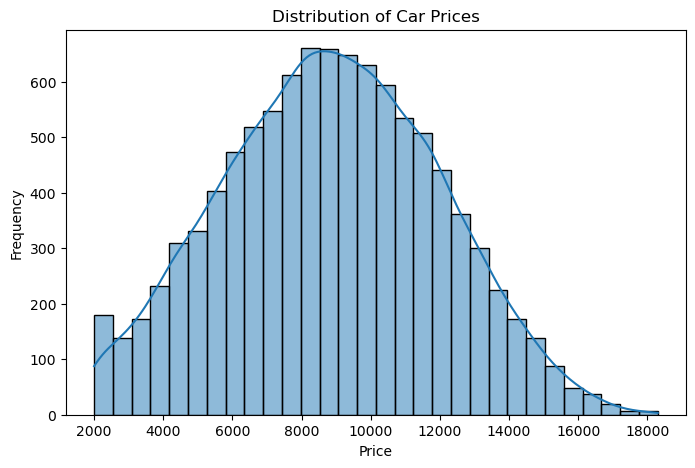

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# A histogram showing how car prices are distributed.

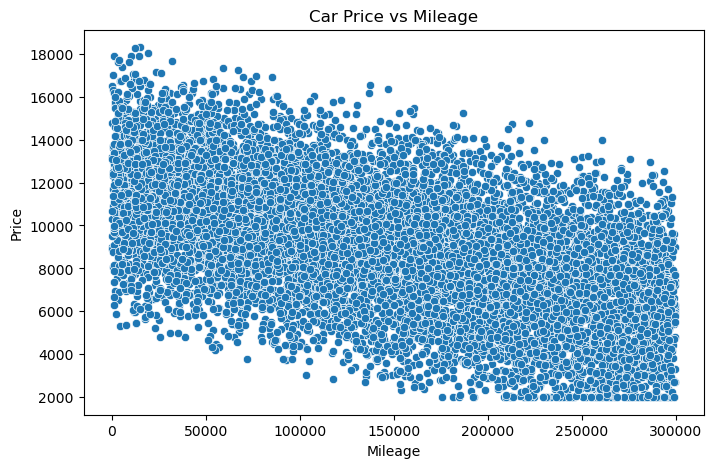

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Car Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot showing how car price relates to mileage.

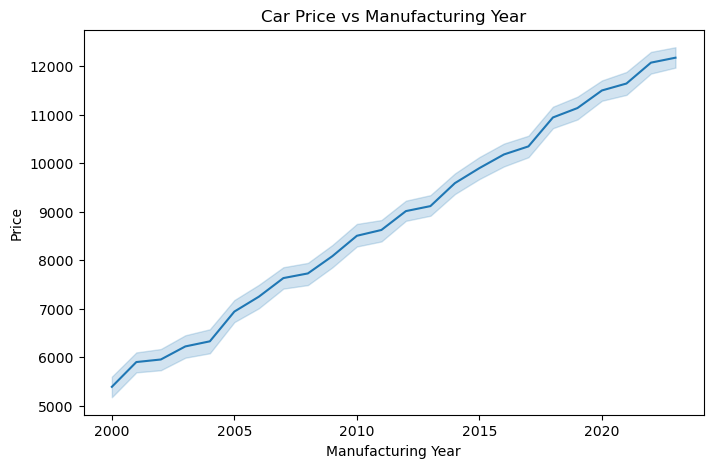

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Price', data=df)
plt.title('Car Price vs Manufacturing Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.show()


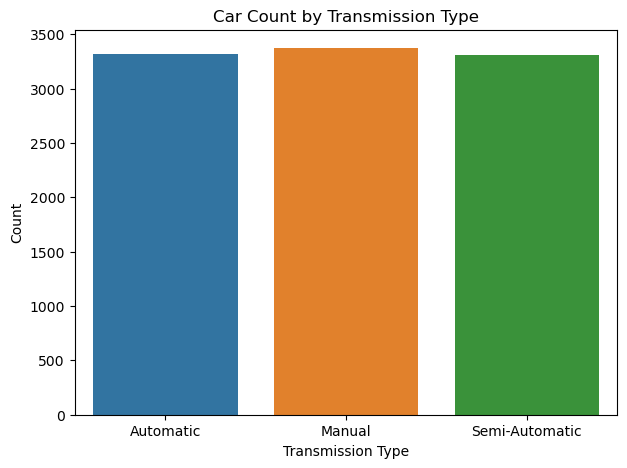

In [18]:

trans_counts = {
    'Automatic': df['Transmission_Automatic'].sum(),
    'Manual': df['Transmission_Manual'].sum(),
    'Semi-Automatic': df['Transmission_Semi-Automatic'].sum()
}

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=list(trans_counts.keys()), y=list(trans_counts.values()))
plt.title('Car Count by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()


In [19]:
print(df.columns)


Index(['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price',
       'Brand_Audi', 'Brand_BMW', 'Brand_Chevrolet', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes',
       'Brand_Toyota', 'Brand_Volkswagen', 'Model_3 Series', 'Model_5 Series',
       'Model_A3', 'Model_A4', 'Model_Accord', 'Model_C-Class', 'Model_CR-V',
       'Model_Camry', 'Model_Civic', 'Model_Corolla', 'Model_E-Class',
       'Model_Elantra', 'Model_Equinox', 'Model_Explorer', 'Model_Fiesta',
       'Model_Focus', 'Model_GLA', 'Model_Golf', 'Model_Impala',
       'Model_Malibu', 'Model_Optima', 'Model_Passat', 'Model_Q5',
       'Model_RAV4', 'Model_Rio', 'Model_Sonata', 'Model_Sportage',
       'Model_Tiguan', 'Model_Tucson', 'Model_X5', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_Hybrid', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual',
       'Transmission_Semi-Automatic'],
      dtype='object')


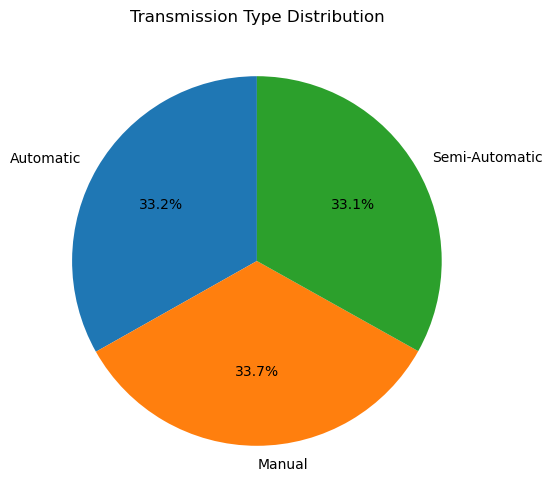

In [20]:
# Step 1: Clean column names
df.columns = df.columns.str.strip()

# Step 2: Pie Chart for Transmission Type Distribution
trans_cols = ['Transmission_Automatic', 'Transmission_Manual', 'Transmission_Semi-Automatic']

trans_counts = df[trans_cols].sum()
trans_counts.index = trans_counts.index.str.replace('Transmission_', '')

plt.figure(figsize=(6,6))
plt.pie(trans_counts, labels=trans_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Transmission Type Distribution')
plt.show()


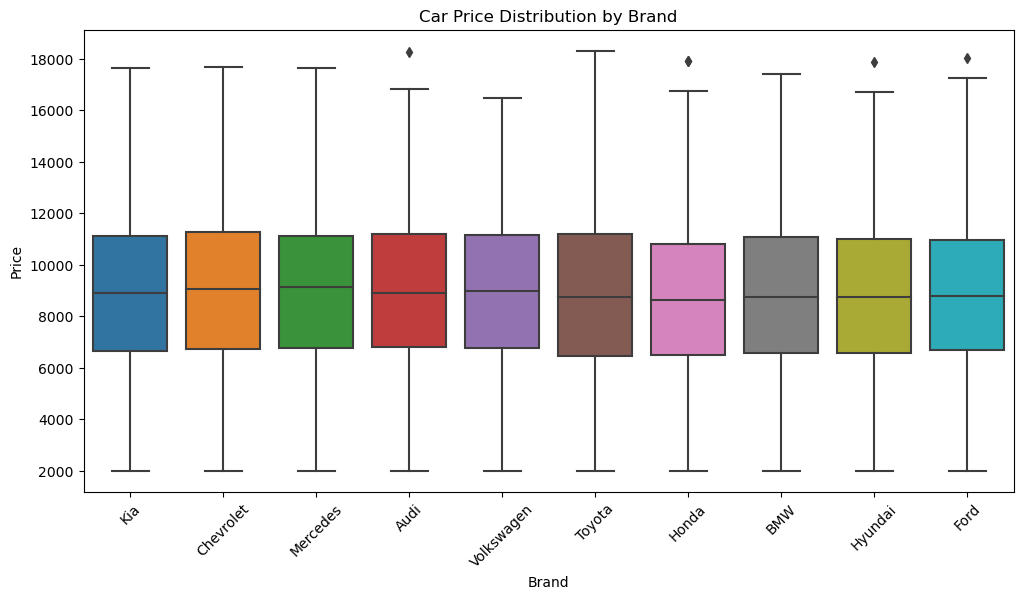

In [21]:
plt.figure(figsize=(12,6))

# Rebuild the brand column from one-hot encoding
brand_cols = [col for col in df.columns if col.startswith('Brand_')]
df['Brand'] = df[brand_cols].idxmax(axis=1).str.replace('Brand_', '')

sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


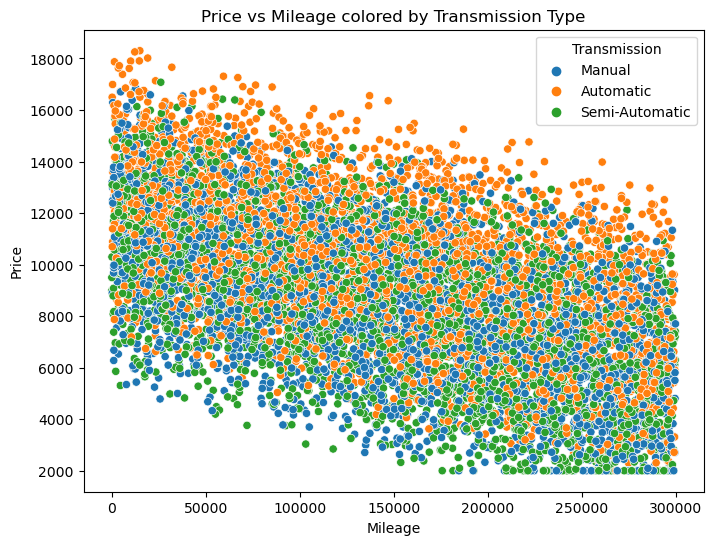

In [22]:
# Transmission column (fixing from one-hot)
trans_cols = ['Transmission_Automatic', 'Transmission_Manual', 'Transmission_Semi-Automatic']
df['Transmission'] = df[trans_cols].idxmax(axis=1).str.replace('Transmission_', '')

plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage', y='Price', hue='Transmission', data=df)
plt.title('Price vs Mileage colored by Transmission Type')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Transmission')
plt.show()


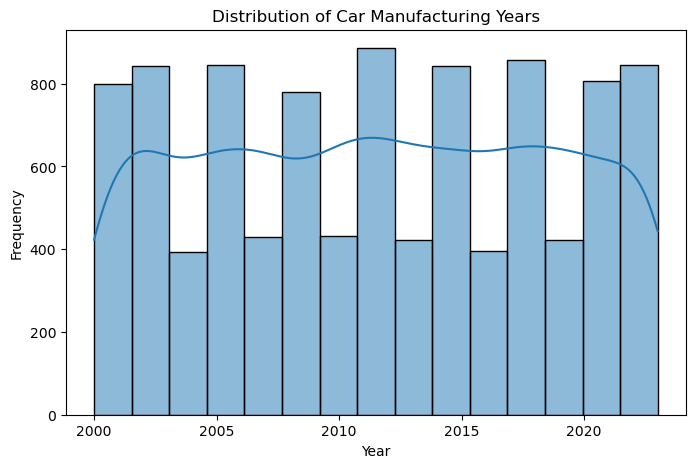

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Year'], bins=15, kde=True)
plt.title('Distribution of Car Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


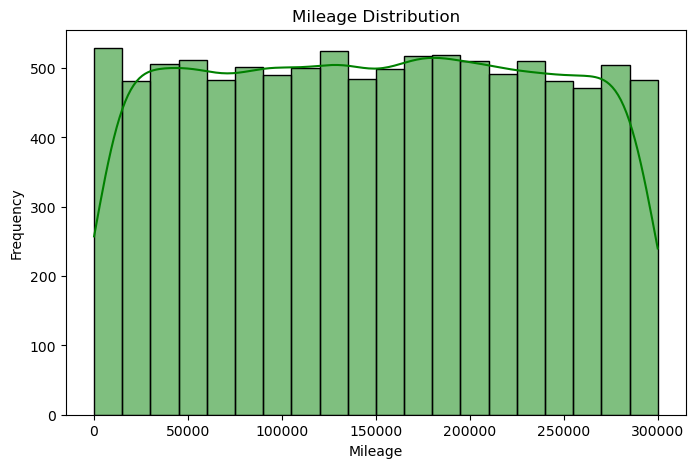

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['Mileage'], bins=20, kde=True, color='green')
plt.title('Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()


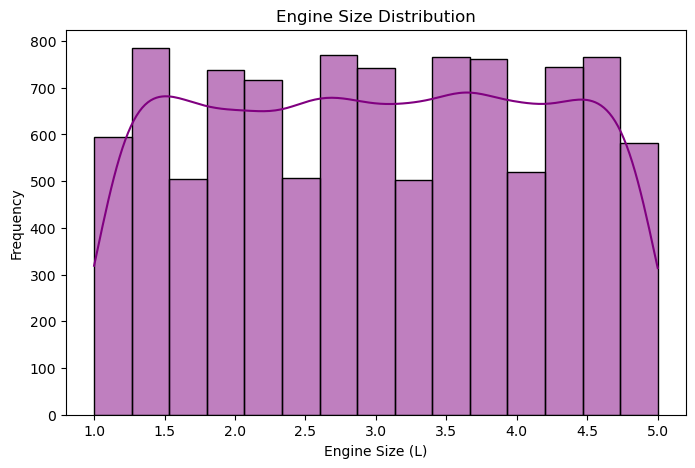

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['Engine_Size'], bins=15, kde=True, color='purple')
plt.title('Engine Size Distribution')
plt.xlabel('Engine Size (L)')
plt.ylabel('Frequency')
plt.show()
